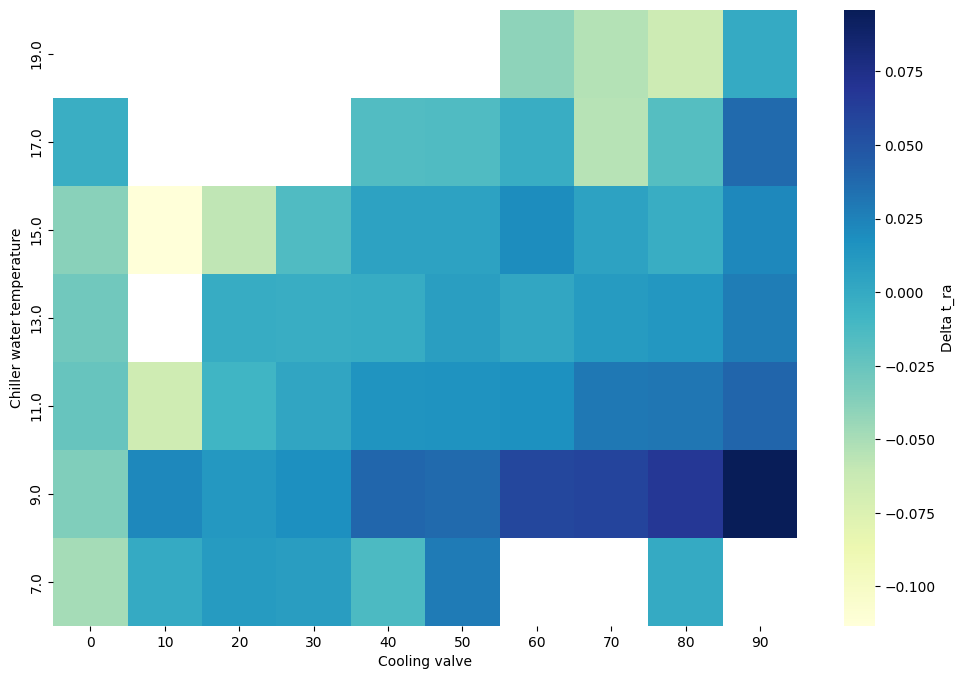

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
file_path = 'data/data_for_heat_map.csv'  # Update this with the correct file path
data = pd.read_csv(file_path) # Update this with the correct file path

# Defining specific bins for cool_valve
cool_valve_bins = np.arange(0, 101, 10)  # Bins from 0 to 100 in steps of 10

# Defining bins for average_ch_water_outlet_temp to 7, 9, 11, 13, etc.
avg_temp_bins_odd = np.arange(7, data['average_ch_water_outlet_temp'].max() + 1, 2)

# Binning the data
data['cool_valve_binned'] = pd.cut(data['cool_valve'], bins=cool_valve_bins, labels=cool_valve_bins[:-1], include_lowest=True)
data['avg_temp_binned_odd'] = pd.cut(data['average_ch_water_outlet_temp'], bins=avg_temp_bins_odd, labels=avg_temp_bins_odd[:-1], include_lowest=True)

# Creating a new pivot table with the updated bins
pivot_table_odd_bins = data.pivot_table(index='avg_temp_binned_odd', 
                                        columns='cool_valve_binned', 
                                        values='delta_T_ra', 
                                        aggfunc=np.mean)

# Plotting the heatmap with the updated bins
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table_odd_bins, cmap="YlGnBu")

# Customizing the color bar title
cbar = heatmap.collections[0].colorbar
cbar.set_label('Delta t_ra')

heatmap.invert_yaxis()  # Inverting the y-axis
# plt.title('Heatmap of Delta T (RA) by Specific Binned Cool Valve and Odd Avg CH Water Outlet Temp')
plt.xlabel('Cooling valve')
plt.ylabel('Chiller water temperature')
plt.show()

##### Intepretation:
##### Generally, as the Cooling valve setting increases, the delta_t_ra tends to show higher values, especially around Chiller water temperatures of 9°C to 15°C and cooling valve > 40.. This suggests that at higher valve settings, the cooling system is causing a larger drop in temperature. Moreover, the distribution of 'Delta_t_ra' is not uniform across the different 'Cooling valve' settings, indicating that some settings have a more significant impact on the temperature difference.
 

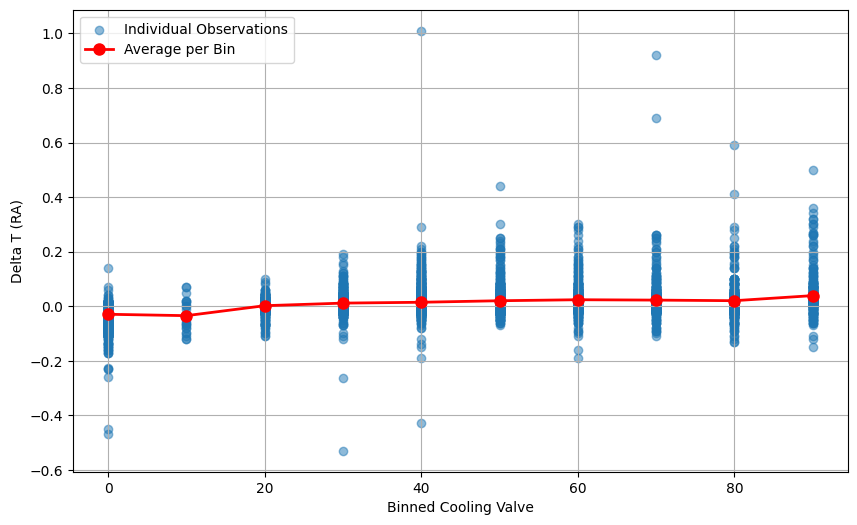

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Load the data
file_path = 'data/data_for_heat_map.csv'  # Update this with the correct file path
data = pd.read_csv(file_path)

# Defining specific bins for cool_valve
cool_valve_bins = np.arange(0, 101, 10)  # Bins from 0 to 100 in steps of 10

# Defining bins for average_ch_water_outlet_temp to 7, 9, 11, 13, etc.
avg_temp_bins_odd = np.arange(7, data['average_ch_water_outlet_temp'].max() + 1, 2)

# Binning the data
data['cool_valve_binned'] = pd.cut(data['cool_valve'], bins=cool_valve_bins, labels=cool_valve_bins[:-1], include_lowest=True)

# Assuming 'cool_valve_binned' has already been created in your dataset
# If not, you would need to create it using pd.cut() as shown in the previous examples

# Calculate the average 'Delta_t_ra' for each 'cool_valve_binned'
avg_delta_t_ra = data.groupby('cool_valve_binned')['delta_T_ra'].mean().reset_index()

# Now we plot the scatter plot again with the average 'Delta_t_ra' values for each bin
plt.figure(figsize=(10, 6))

# Plot all individual observations
plt.scatter(data['cool_valve_binned'], data['delta_T_ra'], alpha=0.5, label='Individual Observations')

# Plot the average 'Delta_t_ra' for each bin
plt.plot(avg_delta_t_ra['cool_valve_binned'], avg_delta_t_ra['delta_T_ra'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Average per Bin')

# plt.title('Scatter Plot of Delta T (RA) vs. Cooling Valve with Averages')
plt.xlabel('Binned Cooling Valve')
plt.ylabel('Delta T (RA)')
# plt.xticks('Delta T (RA)')
plt.grid(True)
plt.legend()
plt.show()


##### Interpretation
##### The red line indicates that the average 'Delta_t_ra' does not vary significantly with changes in the 'Cooling Valve' settings. The average values hover around zero, suggesting that on average, there is no substantial increase or decrease in the temperature difference as the cooling valve setting changes. There are fluctuations in the average values, but they remain relatively close to zero, indicating that the system may be in a balanced state on average, where the temperature at time t and t+1 does not consistently increase or decrease.